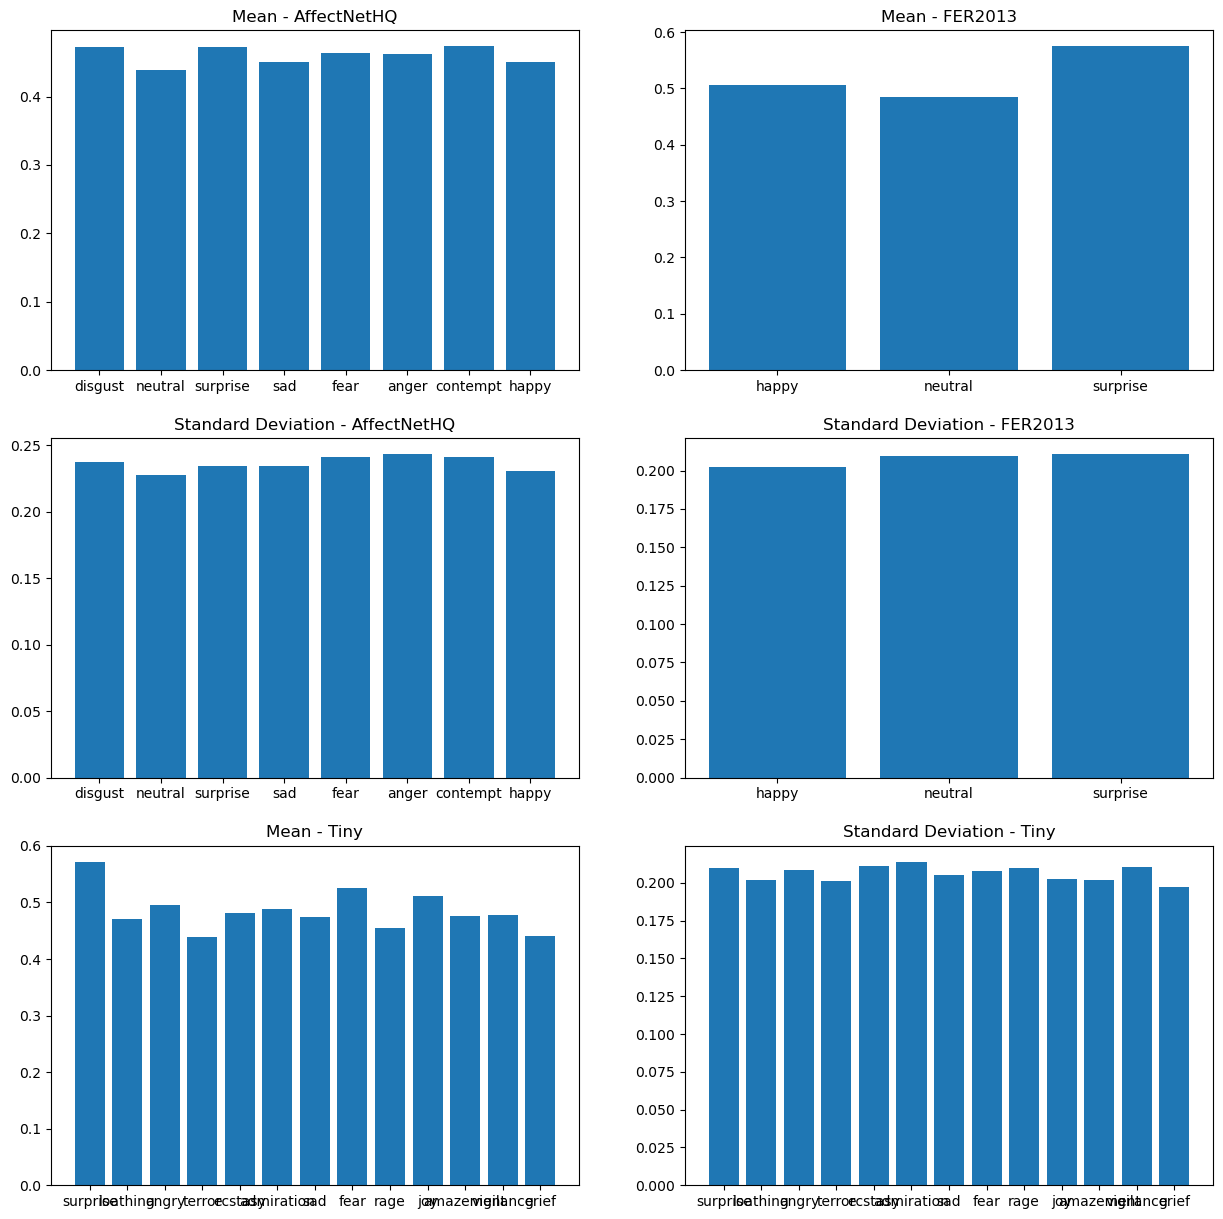

In [1]:
import torch
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import numpy as np
import matplotlib.pyplot as plt

# Define transforms
transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

# Load datasets
dataset1 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/AffectNetHQ/train', transform=transform)
dataset2 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/FER2013/train', transform=transform)
dataset3 = datasets.ImageFolder('/kaggle/input/finaldataset/Datasets/Tiny/train', transform=transform)

# Define dataloaders
dataloader1 = torch.utils.data.DataLoader(dataset1, batch_size=32, shuffle=True)
dataloader2 = torch.utils.data.DataLoader(dataset2, batch_size=32, shuffle=True)
dataloader3 = torch.utils.data.DataLoader(dataset3, batch_size=32, shuffle=True)

# Calculate mean and standard deviation
mean1, std1 = {}, {}
mean2, std2 = {}, {}
mean3, std3 = {}, {}
n1, n2, n3 = {}, {}, {}

for data, target in dataloader1:
    for i in range(data.size(0)):
        class_name = dataset1.classes[target[i]]
        if class_name not in mean1:
            mean1[class_name], std1[class_name] = 0., 0.
            n1[class_name] = 0
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean1[class_name] += data[i].mean()
        std1[class_name] += data[i].std()
        n1[class_name] += 1

for data, target in dataloader2:
    for i in range(data.size(0)):
        class_name = dataset2.classes[target[i]]
        if class_name not in mean2:
            mean2[class_name], std2[class_name] = 0., 0.
            n2[class_name] = 0
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean2[class_name] += data[i].mean()
        std2[class_name] += data[i].std()
        n2[class_name] += 1

for data, target in dataloader3:
    for i in range(data.size(0)):
        class_name = dataset3.classes[target[i]]
        if class_name not in mean3:
            mean3[class_name], std3[class_name] = 0., 0.
            n3[class_name] = 0
        batch_samples = data.size(0)
        data = data.view(batch_samples, data.size(1), -1)
        mean3[class_name] += data[i].mean()
        std3[class_name] += data[i].std()
        n3[class_name] += 1

for class_name in mean1:
    mean1[class_name] /= n1[class_name]
    std1[class_name] /= n1[class_name]

for class_name in mean2:
    mean2[class_name] /= n2[class_name]
    std2[class_name] /= n2[class_name]

for class_name in mean3:
    mean3[class_name] /= n3[class_name]
    std3[class_name] /= n3[class_name]

# Plot mean and standard deviation
fig, axs = plt.subplots(3, 2, figsize=(15, 15))

axs[0, 0].bar(mean1.keys(), mean1.values())
axs[0, 0].set_title('Mean - AffectNetHQ')

axs[0, 1].bar(mean2.keys(), mean2.values())
axs[0, 1].set_title('Mean - FER2013')

axs[1, 0].bar(std1.keys(), std1.values())
axs[1, 0].set_title('Standard Deviation - AffectNetHQ')

axs[1, 1].bar(std2.keys(), std2.values())
axs[1, 1].set_title('Standard Deviation - FER2013')

axs[2, 0].bar(mean3.keys(), mean3.values())
axs[2, 0].set_title('Mean - Tiny')

axs[2, 1].bar(std3.keys(), std3.values())
axs[2, 1].set_title('Standard Deviation - Tiny')

plt.show()